In [486]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [487]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

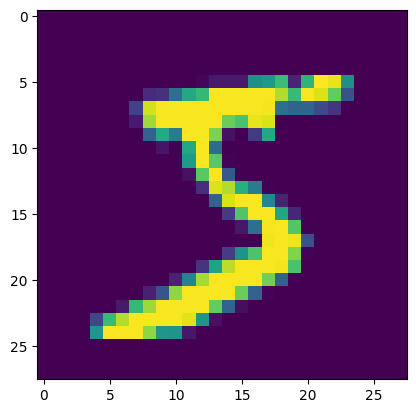

In [488]:
plt.imshow(X_train[0])

In [489]:
y_train==0

array([False,  True, False, ..., False, False, False])

In [490]:
only_zeros = X_train[y_train==0]

In [491]:
only_zeros.shape

(5923, 28, 28)

In [492]:
X_train.shape

(60000, 28, 28)

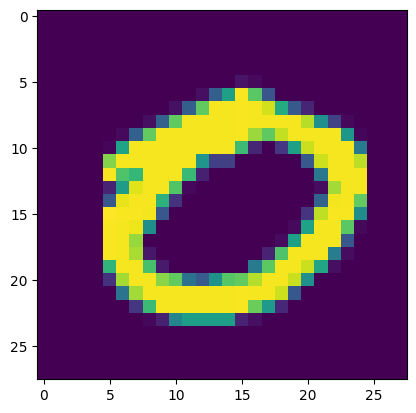

In [493]:
plt.imshow(only_zeros[14])

In [494]:
coding_size = 200
generator = Sequential()
generator.add(Dense(100, activation = 'relu', input_shape = [coding_size]))
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))
generator.add(Reshape([28,28]))

In [495]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [28,28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100,activation = 'relu'))
discriminator.add(Dense(1, activation = 'sigmoid'))
discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [496]:
GAN = Sequential([generator, discriminator])
discriminator.trainable = False

In [497]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [498]:
batch_size = 32

In [499]:
my_data = only_zeros #my_data = X_train

In [500]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size = 1000)

In [501]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [502]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [503]:
epochs = 55

In [504]:
GAN.layers[0].layers

In [505]:
GAN.layers[1].layers

In [506]:
GAN.layers[0].summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 100)               20100     
                                                                 
 dense_91 (Dense)            (None, 150)               15150     
                                                                 
 dense_92 (Dense)            (None, 784)               118384    
                                                                 
 reshape_15 (Reshape)        (None, 28, 28)            0         
                                                                 
Total params: 153634 (600.13 KB)
Trainable params: 153634 (600.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [507]:
GAN.layers[1].summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_93 (Dense)            (None, 150)               117750    
                                                                 
 dense_94 (Dense)            (None, 100)               15100     
                                                                 
 dense_95 (Dense)            (None, 1)                 101       
                                                                 
Total params: 132951 (519.34 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


In [508]:
generator, discriminator = GAN.layers
for epoch in range(epochs):
  print(f"Currently on Epoch{epoch+1}")
  i = 0;
  for X_batch in dataset:
    i = i+1
    if i%100 == 0:
      print(f"\t Currently on batch number {i} of {(len(my_data)//batch_size)}")

      #Discriminator
      noise = tf.random.normal(shape = [batch_size, coding_size])
      gen_images = generator(noise)
      X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis = 0)
      y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_vs_real,y1)

      #train generator
      noise = tf.random.normal(shape = [batch_size, coding_size])
      y2 = tf.constant([[1.0]]*batch_size)
      discriminator.trainable = False
      GAN.train_on_batch(noise, y2)

Currently on Epoch1
	 Currently on batch number 100 of 185
Currently on Epoch2
	 Currently on batch number 100 of 185
Currently on Epoch3
	 Currently on batch number 100 of 185
Currently on Epoch4
	 Currently on batch number 100 of 185
Currently on Epoch5
	 Currently on batch number 100 of 185
Currently on Epoch6
	 Currently on batch number 100 of 185
Currently on Epoch7
	 Currently on batch number 100 of 185
Currently on Epoch8
	 Currently on batch number 100 of 185
Currently on Epoch9
	 Currently on batch number 100 of 185
Currently on Epoch10
	 Currently on batch number 100 of 185
Currently on Epoch11
	 Currently on batch number 100 of 185
Currently on Epoch12
	 Currently on batch number 100 of 185
Currently on Epoch13
	 Currently on batch number 100 of 185
Currently on Epoch14
	 Currently on batch number 100 of 185
Currently on Epoch15
	 Currently on batch number 100 of 185
Currently on Epoch16
	 Currently on batch number 100 of 185
Currently on Epoch17
	 Currently on batch number 

In [509]:
noise = tf.random.normal(shape = [10, coding_size])

In [510]:
noise.shape

TensorShape([10, 200])

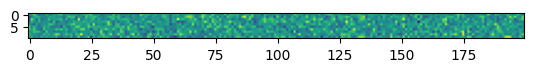

In [511]:
plt.imshow(noise)

In [512]:
images = generator(noise)

In [513]:
images.shape

TensorShape([10, 28, 28])

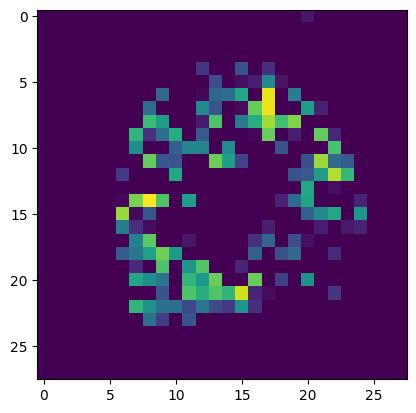

In [514]:
plt.imshow(images[0])

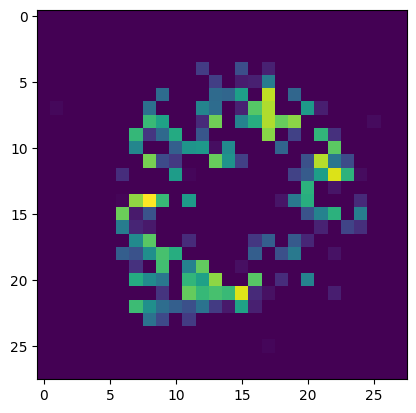

In [515]:
plt.imshow(images[1])

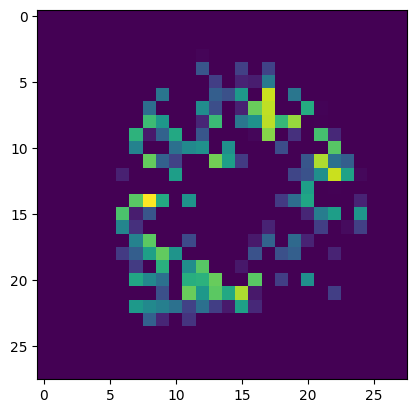

In [516]:
plt.imshow(images[2])

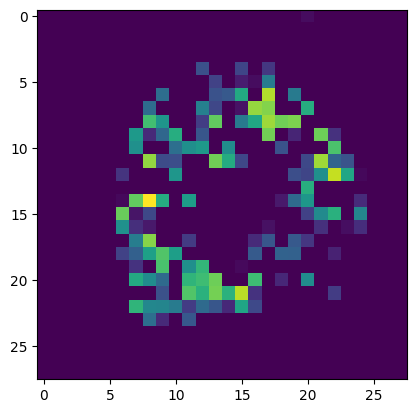

In [517]:
plt.imshow(images[4])

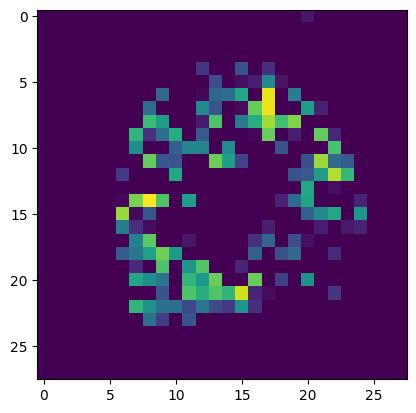

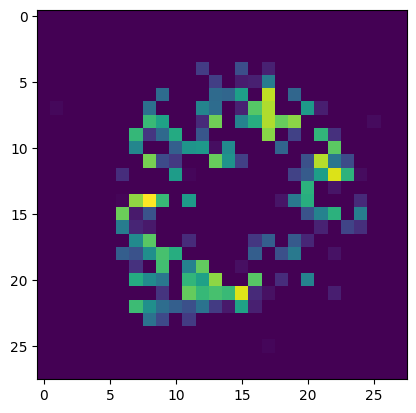

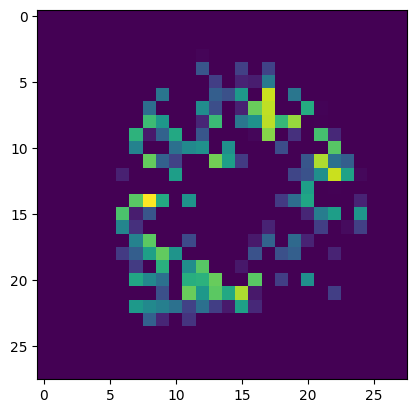

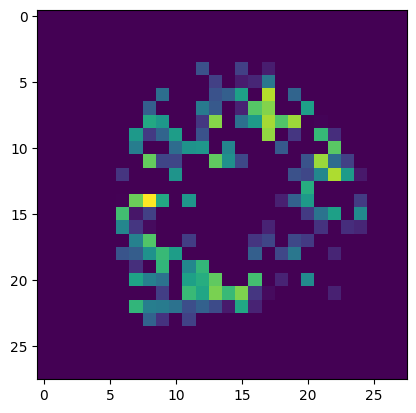

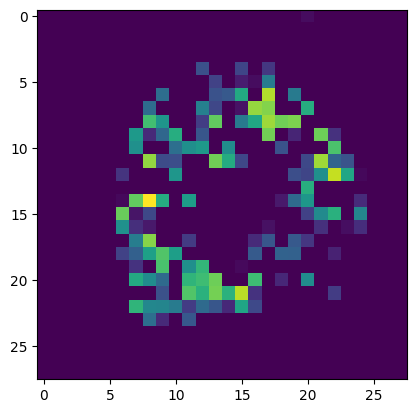

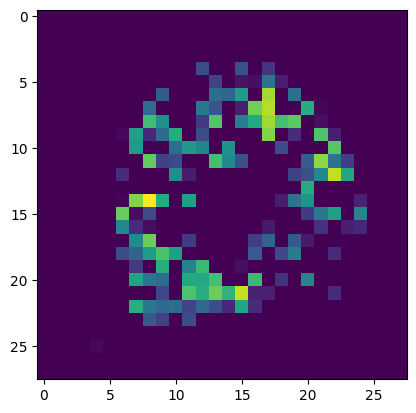

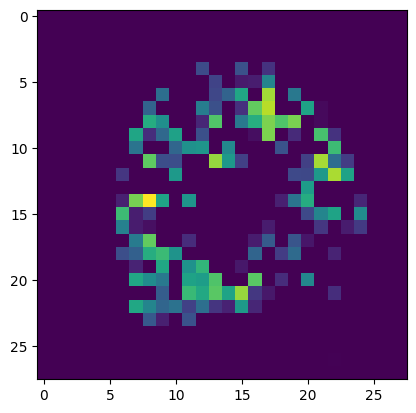

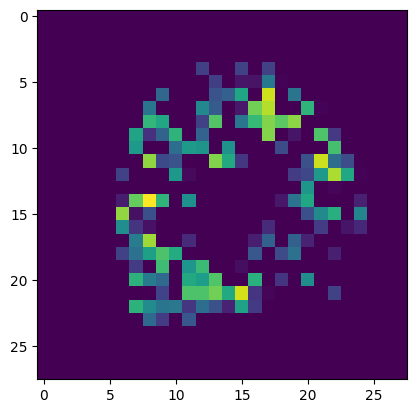

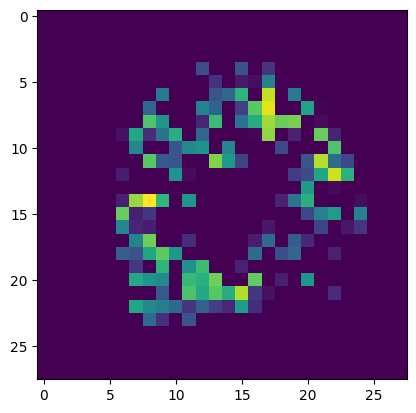

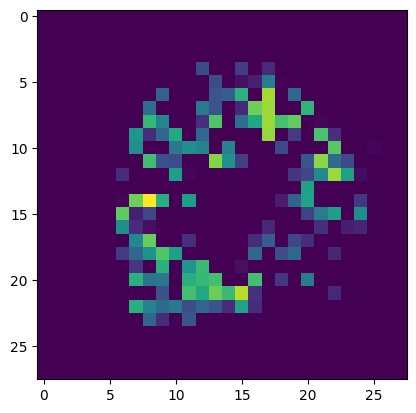

In [518]:
for image in images:
    plt.imshow(image.numpy().reshape(28,28))
    plt.show()